Написать программу, решающую краевую задачу следующего вида:
$$
\begin{cases}
\dot{x} = f(t, x) \quad\ \quad\ \quad t \in [t_0, t_1],\ x \in \mathbb{R}^n \\
G(x(t_0), x(t_1)) = 0 \quad f: \mathbb{R}^{n + 1} \to \mathbb{R}^n, G: \mathbb{R}^{2n} \to \mathbb{R}^n
\end{cases}
$$

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [6]:
def my_solve_bvp(fun, t_bc, param_t, bc_l, n_param_l, bc_r, param_r, x):
    # x' = fun(x, t), x - n-мерный вектор
    # t_bc = [t_0, t_1]
    # 
    # bc_l - n-мерный вектор, представляющий собой левые границы
    # bc_r - n-мерный вектор, представляющий собой праввый границы
    
    def func(p):
        if param_t:
            t_bc[1] = p[-1]
        bc_l[param_l] = p[:sum(param_l)]
        sol = solve_ivp(fun, t_bc, bc_l, t_eval=x)
        
        bc_r_2 = np.zeros(bc_r.shape)
        for i in range(len(bc_r)):
            exec('bc_r_2[i] = ' + bc_r[i])

        return np.linalg.norm((sol.y[:, -1] - bc_r_2)[n_param_r])

    min_sol = minimize(func, bc_l[param_l])
    bc_l[param_l] = min_sol.x
    sol = solve_ivp(fun, t_bc, bc_l, t_eval=x)
    return sol

__(1)__ $\ \int\limits_{0}^{4} u^2 dt\to min\\ \dot{x} = x + u,\ u \in [-1, 1],\ x(0) = 0.25,\ x(4) = 0$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi \cdot (x + u) - \lambda_0 \cdot u^2$

$\frac{\partial H}{\partial u} = \psi - 2 \lambda_0 \cdot u$     
Следовательно, $u_B = \frac{\psi}{2 \lambda_0}$ - экстремум. Это будет максимум, поскольку $\frac{\partial^2 H}{\partial u^2} = -2 \lambda_0 \leq 0$, если $\lambda_0 \geq 0$.

Так как $u \in [-1, 1]$, если $\frac{\psi}{2 \lambda_0} < -1$, то максимум H будет в точке $u=-1$, если $\frac{\psi}{2 \lambda_0} > 1$, то максимум H будет в точке $u=1$, если же $\frac{\psi}{2 \lambda_0} \in [-1, 1]$, то максимум H будет в точке $u=\frac{\psi}{2 \lambda_0}$. 

Имеем дело с тремя случаями:    
Если $\psi < -2 \lambda_0$, краевая задача имеет вид:
$$
\begin{cases}
\dot{x} = x -1\\
\dot{\psi} = -\psi \\
x(0) - 0.25 = 0\\
x(4) = 0\\
\lambda_0 \geq 0
\end{cases}    
$$
    
Если $\psi > 2 \lambda_0$, краевая задача имеет вид:
$$
\begin{cases}
\dot{x} = x + 1\\
\dot{\psi} = -\psi \\
x(0) - 0.25 = 0\\
x(4) = 0\\
\lambda_0 \geq 0
\end{cases}
$$
    
Иначе 
$$
\begin{cases}
\dot{x} = x + \frac{\psi}{2\lambda_0}\\
\dot{\psi} = -\psi \\
x(0) - 0.25 = 0\\
x(4) = 0\\
\lambda_0 \geq 0
\end{cases}
$$

In [109]:
def fun(x, y):
    result = np.vstack((y[0] + y[1] / 2, -y[1]))
    l = np.where(y[1] < -2)
    if (l[0].shape[0] > 0):
        result[0, l] = result[0, l] - y[1] / 2 - 1
    l = np.where(y[1] > 2)
    if (l[0].shape[0] > 0):
        result[0, l] = result[0, l] - y[1] / 2 + 1
    return result.reshape((-1))

x = np.linspace(0, 4)
bc_l = np.array([0.25, 0.])
param_l = np.array([False, True])
bc_r = np.array(['0', '0'])
n_param_r = np.array([True, False])

#sol = solve_bvp(fun, bc, x, y, p=[1])
sol = my_solve_bvp(fun, [0, 4], False, bc_l, param, bc_r, n_param_r, x)

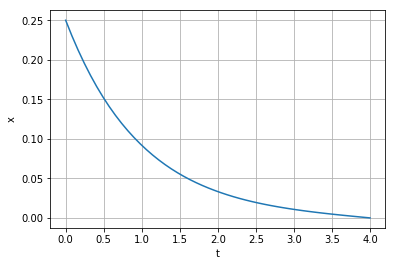

In [110]:
x_plot = np.linspace(0, 4, 50)
y_plot = sol.y[0, :]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

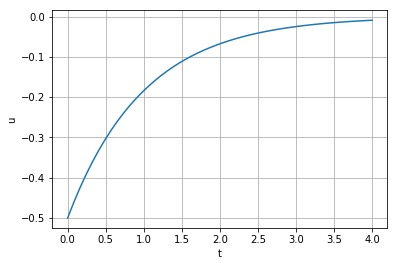

In [111]:
x_plot = np.linspace(0, 4, 50)
y_plot = sol.y[1, :] / 2
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.show()

Проверим решение аналитически:

Краевая задача имеет вид:
$$
\begin{cases}
\dot{x} = x + \frac{\psi}{2\lambda_0}\cdot Ind[-2 \lambda_0 <= \psi <= 2 \lambda_0]  - Ind[\psi < -2 \lambda_0] + Ind[\psi > 2 \lambda_0]\\
\dot{\psi} = -\psi \\
x(0) - 0.25 = 0\\
x(4) = 0\\
\lambda_0 \geq 0
\end{cases}    
$$

Второе дифференциальное уравнение можно решить сразу, поскольку оно не зависит от x:    
$$
\psi = c_1 \cdot e^{-t}
$$
Если $c_1 \cdot e^{-t} < -2 \lambda_0$:    
$$
\dot{x} = x - 1 \Rightarrow x = c_2 e^t + 1
$$
$$
x(0) = c_2 + 1 = 0,25,\ x(4) = c_2 e^4 + 1 = 0 \Rightarrow \emptyset
$$

Если $c_1 \cdot e^{-t} > 2 \lambda_0$:    
$$
\dot{x} = x - 1 \Rightarrow x = c_2 e^t - 1
$$
$$
x(0) = c_2 - 1 = 0,25,\ x(4) = c_2 e^4 - 1 = 0 \Rightarrow \emptyset
$$

Иначе:    
$$
\dot{x} = x - 1 \Rightarrow x = c_2 e^t - \frac{c_1}{4} e^{-t}
$$
$$
x(0) = c_2 - \frac{c_1}{4} = 0,25,\ x(4) = c_2 e^4 - \frac{c_1}{4} e^{-4} = 0 \Rightarrow c_1 = -\frac{e^4}{e^4 - e^{-4}},\ c_2 = \frac{1}{4} \left(1 - \frac{e^4}{e^4 - e^{-4}}\right)
$$
Таким образом,
$$
x(t) = \frac{1}{4} \left(1 - \frac{e^4}{e^4 - e^{-4}}\right) e^t + \frac{e^4}{4 (e^4 - e^{-4})} e^{-t}
$$
$$
\psi(t) = -\frac{e^4}{e^4 - e^{-4}} \cdot e^{-t}
$$
$$
u(t) = -\frac{e^4}{2(e^4 - e^{-4})} \cdot e^{-t}
$$
Если нарисовать оба графика решений, решения совпадут. В остальных номерах была проведена такая же проверка аналитическим решением.

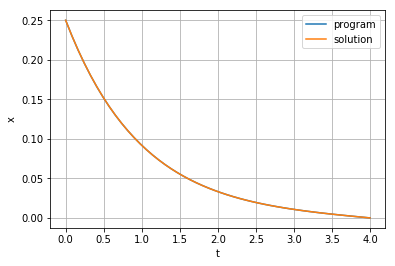

In [56]:
x_plot = np.linspace(0, 4, 50)
y_plot = sol.y[0, :]
plt.plot(x_plot, y_plot, label='program')
c1 = - np.exp(4) / (np.exp(4) - np.exp(-4))
c2 = 1/4 * (1 + c1)
x_true = c2 * np.exp(x_plot) - c1/4 * np.exp(-x_plot)
plt.plot(x_plot, x_true, label='solution')
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.legend()
plt.show()

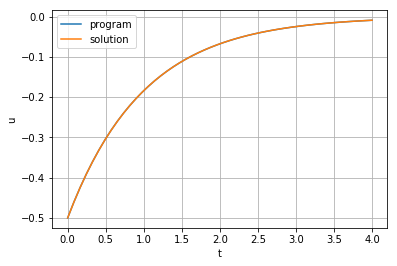

In [57]:
x_plot = np.linspace(0, 4, 50)
y_plot = sol.y[1, :] / 2
plt.plot(x_plot, y_plot, label='program')
u_true = -np.exp(4) / (2 * (np.exp(4) - np.exp(-4))) * np.exp(-x_plot)
plt.plot(x_plot, u_true, label='solution')
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()

__(2)__ $x^2(4) \to min\\ \dot{x} = x + u,\ x(0)=10,\ u \in [-1, 1]$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi \cdot (x + u)$

$u \in [-1, 1]$, а H линейна по u, поэтому максимум функции будет достигаться либо в точке $u = -1$, либо в $u = 1$.

Поскольку один из концов свободен, $\lambda_0 = 1$.

Краевая задача имеет вид:
$$
\begin{cases}
\dot{x} = x + Ind[\psi >= 0] - Ind[\psi < 0]\\
\dot{\psi} = -\psi \\
x(0) = 10\\
\psi(4) = -2x(4)\\
\end{cases}    
$$

In [160]:
def fun(x, y):
    result = np.vstack((y[0] + 1, -y[1]))
    l = np.where(y[1] < 0)
    if (l[0].shape[0] > 0):
        result[0, l] = result[0, l] - 2
    return result.reshape((-1))

x = np.linspace(0, 4)
bc_l = np.array([10., 0.])
param_l = np.array([False, True])
bc_r = np.array(['0', '-2 * sol.y[0, -1]'])
n_param_r = np.array([False, True])

# sol = solve_bvp(fun, bc, x, y)
sol = my_solve_bvp(fun, [0, 4], False, bc_l, param, bc_r, n_param_r, x)

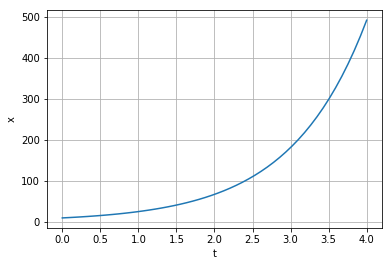

In [162]:
x_plot = np.linspace(0, 4, 50)
y_plot = sol.y[0, :]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

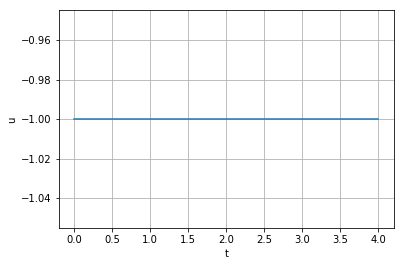

In [163]:
x_plot = np.linspace(0, 4, 50)
psi = sol.y[1, :]
y_plot = np.ones(x_plot.shape)
y_plot[psi < 0] = -1
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.show()

<img src='02.jpg'>

__(3)__ $\int\limits_{0}^{T} \left( u^2 - x^2 \right)dt\\    
\dot{x} = x + u,\ x(0)=0,\ u \in [-1, 1],\ T-parameter$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi \cdot (x + u) - \lambda_0 \cdot (u^2 - x^2)$.

Зафиксирован лишь левый конец, поэтому $\lambda_0 = 1$.    
Тогда H как функция от u является параболой, ветви которой направлены вниз, максимум будет находиться в вершине $u_B = \frac{\psi}{2}$, если $\psi \in [-2, 2]$, иначе максимум будет достигаться в $u = 1$ (если вершина правее) или u = -1 (если вершина левее).

Тогда краевая задача имеет вид:    
$$
\begin{cases}
  \dot{x} = x + \frac{\psi}{2} \cdot Ind[-2 <= \psi <= 2] + Ind[\psi > 2] - Ind[\psi < -2]\\
  \dot{\psi} = -\psi - 2x\\
  x(0) = 0\\
  \psi(T) = 0\\
\end{cases}
$$

In [345]:
T = [1, 4, 10, 19, 20]
sol = []

In [346]:
for i in T:
    def fun(x, y):
        result = np.vstack((y[0] + y[1]/2, -y[1] - 2*y[0]))
        l = np.where(y[1] > 2)
        if (l[0].shape[0] > 0):
            result[0, l] = result[0, l] - y[1, l]/2 + 1
        l = np.where(y[1] < -2)
        if (l[0].shape[0] > 0):
            result[0, l] = result[0, l] - y[1, l]/2 - 1
        return result
    
    def bc(ya, yb):
        return np.array([ya[0], yb[1]])
    
    x = np.linspace(0, i, i * 10 + 1)
    y = np.zeros((2, x.size))
    
    sol_t = solve_bvp(fun, bc, x, y)
    sol.append(sol_t)

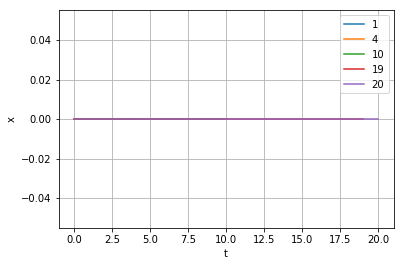

In [347]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    y_plot = sol[i].sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.show()

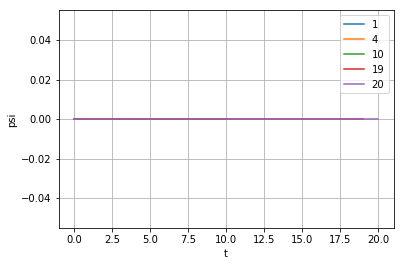

In [348]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    y_plot = sol[i].sol(x_plot)[1]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi")
plt.legend()
plt.grid()
plt.show()

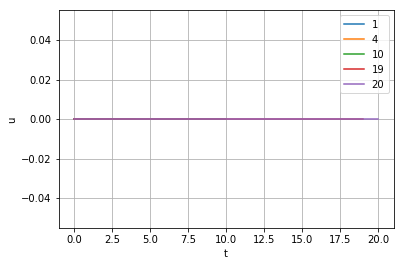

In [349]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    psi = sol[i].sol(x_plot)[1]
    y_plot = psi/2
    y_plot[psi < -2] = -1
    y_plot[psi > 2] = 1
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()

<img src='03.jpg'>

__(4)__ $\int\limits_{0}^{T} \left(u^2 - x^2 \right)dt\\ \dot{x} = x + u,\ x(0)=0,\ T - parameter$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi \cdot (x + u) - \lambda_0 \cdot (u^2 - x^2)$.   

Зафиксирован лишь левый конец, поэтому $\lambda_0 = 1$.    
Тогда H как функция от u является параболой, ветви которой направлены вниз, максимум будет находиться в вершине $u_B = \frac{\psi}{2}$.

Тогда краевая задача имеет вид:    
$$
\begin{cases}
  \dot{x} = x + \frac{\psi}{2}\\
  \dot{\psi} = -\psi - 2x\\
  x(0) = 0\\
  \psi(T) = 0\\
\end{cases}
$$

In [331]:
T = [1, 4, 10, 19, 20]
sol = []

In [334]:
for i in T:
    def fun(x, y):
        return np.vstack((y[0] + y[1]/2, -y[1] - 2*y[0]))
    
    def bc(ya, yb):
        return np.array([ya[0], yb[1]])
    
    x = np.linspace(0, i, i * 10 + 1)
    y = np.zeros((2, x.size))
    
    sol_t = solve_bvp(fun, bc, x, y)
    sol.append(sol_t)

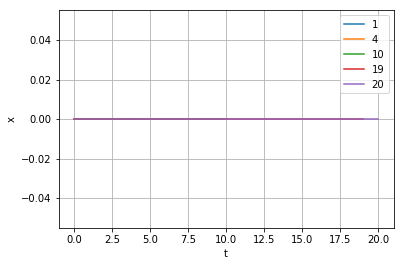

In [335]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    y_plot = sol[i].sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.show()

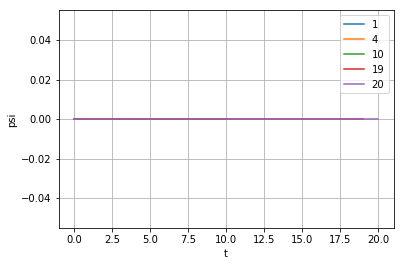

In [337]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    y_plot = sol[i].sol(x_plot)[1]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi")
plt.legend()
plt.grid()
plt.show()

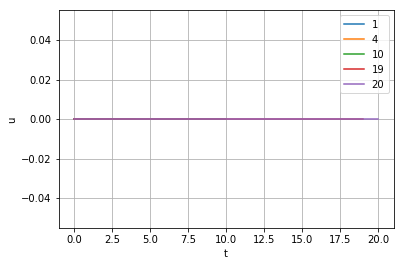

In [338]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    psi = sol[i].sol(x_plot)[1]
    y_plot = psi/2
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()

<img src='04.jpg'>

__(5)__ $\int\limits_{0}^{10} \left(x^2 + y^2 + u^2 \right)dt\\ \dot{x} = y,\ \dot{y}=-x+u,\ x(0)=10$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi_1 \cdot y + \psi_2 \cdot (-x + u) - \lambda_0 \cdot (x^2 + y^2 + u^2)$.   

Зафиксирован лишь левый конец, поэтому $\lambda_0 = 1$.    
Тогда H как функция от u является параболой, ветви которой направлены вниз, максимум будет находиться в вершине $u_B = \frac{\psi_2}{2}$.

Тогда краевая задача имеет вид:    
$$
\begin{cases}
  \dot{x} = y\\
  \dot{y} = -x + \frac{\psi_2}{2}\\
  \dot{\psi_1} = \psi_2 + 2x\\
  \dot{\psi_2} = -\psi_1 + 2y\\
  x(0) = 10\\
  \psi_1(10) = 0\\
  \psi_2(0) = 0\\
  \psi_2(10) = 0\\
\end{cases}
$$

In [325]:
def fun(x, y):
    return np.vstack((y[1], -y[0] + y[3]/2, y[3]+2*y[0], -y[2]+2*y[1]))

def bc(ya, yb):
    return np.array([ya[0] - 10, ya[3], yb[2], yb[3]])

x = np.linspace(0, 10)
y = np.zeros((4, x.size))

sol = solve_bvp(fun, bc, x, y)

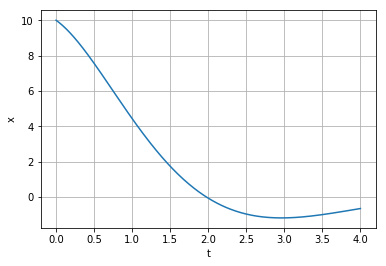

In [326]:
x_plot = np.linspace(0, 4, 400)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

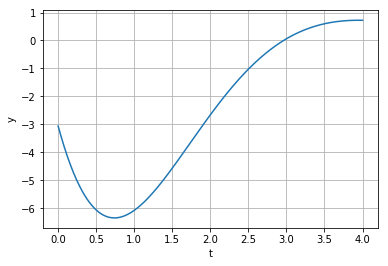

In [327]:
x_plot = np.linspace(0, 4, 400)
y_plot = sol.sol(x_plot)[1]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

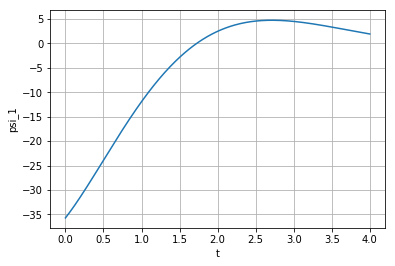

In [328]:
x_plot = np.linspace(0, 4, 400)
y_plot = sol.sol(x_plot)[2]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("psi_1")
plt.grid()
plt.show()

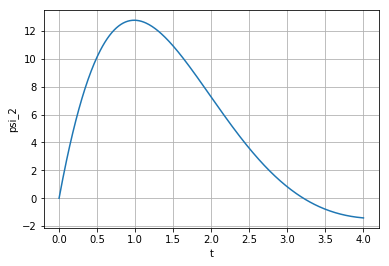

In [329]:
x_plot = np.linspace(0, 4, 400)
y_plot = sol.sol(x_plot)[3]
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("psi_2")
plt.grid()
plt.show()

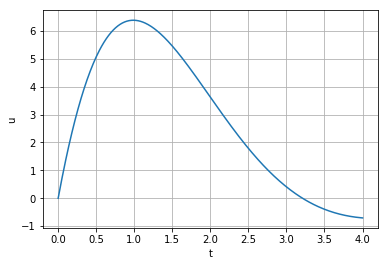

In [330]:
x_plot = np.linspace(0, 4, 400)
psi = sol.sol(x_plot)[3]
y_plot = psi / 2
plt.plot(x_plot, y_plot)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.show()

<img src='05.jpg'>

__(6)__ 
$\ \int\limits_{0}^{T} \left( |u(t)|+y^2(t) \right) dt + x^2(T) \to min\\ \dot{x} = y,\ \dot{y}=-x+u,\ x(0)=1,\ y(0)=1,\ u\in [-1,1]$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi_1 \cdot y + \psi_2 \cdot(-x + u) - \lambda_0 \cdot (|u| + y^2) = \psi_2 u - \lambda_0 |u| + \psi_1 y - \psi_2 x - \lambda_0 y^2 \to max$    
Если $\psi_2 < 0$, то $u < 0$, если же $\psi_2 \geq 0$, то $u \geq 0$.    
Так как $u \in [-1, 1]$, а функция H линейна по $u$, то максимум будет достигаться либо в -1, либо в 1.

Зафиксирован лишь левый конец, поэтому $\lambda_0 = 1$.

Краевая задача имеет вид:    
$$
\begin{cases}
  \dot{x} = y\\
  \dot{y} = -x + Ind[\psi_2 >= 0] - Ind[\psi_2 < 0]\\
  \dot{\psi_1} = \psi_2\\
  \dot{\psi_2} = -\psi_1 + 2y\\
  x(0) = 1\\
  y(0) = 1\\
  \psi_1(T) = -2 x(T)\\
  \psi_2(T) = 0\\
\end{cases}
$$

In [39]:
T = [1, 4, 10, 19, 20]
sol = []

for i in T:
    def fun(x, y):
        result = np.vstack((y[1], -y[0] + 1, y[3], -y[2] + 2 * y[1]))
        l = np.where(y[3] < 0)
        if (l[0].shape[0] > 0):
            result[1, l] = result[1, l] - 2
        return result.reshape((-1))
    
    x = np.linspace(0, i)
    bc_l = np.array([1., 1., 0., 0.])
    param_l = np.array([False, False, True, True])
    bc_r = np.array(['0', '0', '-2 * sol.y[0, -1]', '0'])
    n_param_r = np.array([False, False, True, True])
    
    # sol_t = solve_bvp(fun, bc, x, y)
    sol_t = my_solve_bvp(fun, [0, i], False, bc_l, param_l, bc_r, n_param_r, x)
    sol.append(sol_t)

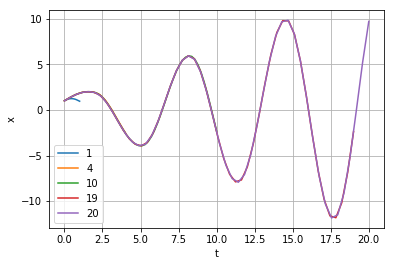

In [40]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].y[0, :]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()
plt.show()

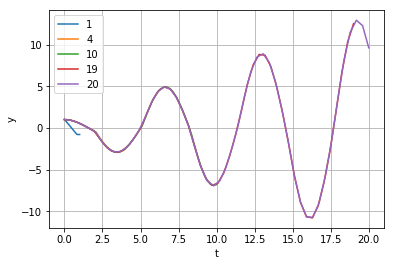

In [42]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].y[1, :]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

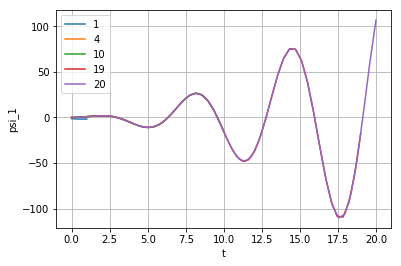

In [43]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].y[2]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_1")
plt.legend()
plt.grid()
plt.show()

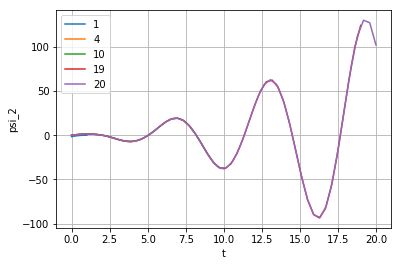

In [45]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].y[3]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_2")
plt.legend()
plt.grid()
plt.show()

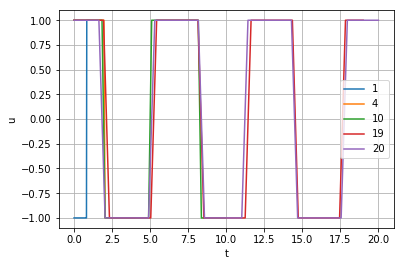

In [46]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    psi = sol[i].y[3]
    y_plot = np.zeros(psi.shape)
    y_plot[psi < 0] = -1
    y_plot[psi >= 0] = 1
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()

__(7)__ 
$\ \int\limits_{0}^{T} \left( (s - 1) k + bz \right) dt \to min\\ \dot{k} = sk,\ \dot{z} = k,\ k(0) = k_0,\ z(0)=z_0,\ s\in[0, 1],\ z(T) \leq z_1$

О b ничего неизвестно, пусть b - константа из R (параметр).

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi_1 \cdot sk + \psi_2 \cdot k - \lambda_0 \cdot ((s - 1) k + bz) = \psi_1 \cdot sk - \lambda_0 \cdot sk + \psi_2 \cdot k - \lambda_0 \cdot (- k + bz) \to max$    
s - управляющий вектор    
Задан только левый конец, поэтому $\lambda_0 = 1$.    
$s \in [0, 1]$, а функция H линейно зависит от s, поэтому ее максимум достигается в 0 или в 1.

Краевая задача имеет следующий вид:    
$$
\begin{cases}
  \dot{k} = Ind[\psi_1 k - k \geq 0] k\\
  \dot{z} = k\\
  \dot{\psi_1} = (1 -\psi_1 ) Ind[\psi_1 k - k \geq 0] - \psi_2 - 1\\
  \dot{\psi_2} = b\\
  k(0) = k_0\\
  z(0) = z_0\\
  \psi_1(T) = 0\\
  \psi_2(T) = 0\\
  z(T) \leq z_1
\end{cases}
$$

In [291]:
T = [1, 4, 10, 19, 20]
k0 = 2
z0 = 3
b = 5
z1 = 10
sol = []

In [292]:
# p[0] = epsilon for z(T) + epsilon = z_1

for i in T:
    def fun(x, y, p):
        result = np.vstack((np.zeros(y[0].shape), y[0], -y[3]-1, b*np.ones(y[0].shape)))
        l = np.where(y[2] * y[0] - y[0] >= 0)
        if (l[0].shape[0] > 0):
            result[0, l] = result[0, l] + y[0, l]
            result[2, l] = result[2, l] + (-y[2, l] + 1)
        return result
    
    def bc(ya, yb, p):
        return np.array([ya[0] - k0, ya[1] - z0, yb[2], yb[3], yb[1] + p[0] - z1])
    
    x = np.linspace(0, i, i * 10 + 1)
    y = np.zeros((4, x.size))
    
    sol_t = solve_bvp(fun, bc, x, y, p=[1])
    sol.append(sol_t)

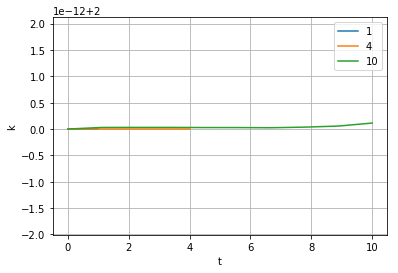

In [300]:
for i in range(len(T)-2):
    x_plot = np.linspace(0, T[i], 10)
    y_plot = sol[i].sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("k")
plt.legend()
plt.grid()
plt.show()

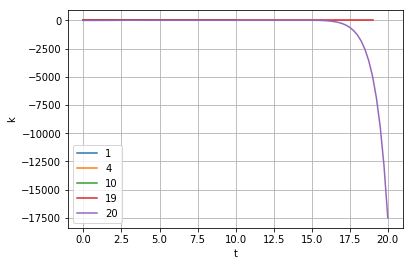

In [301]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], i*20+1)
    y_plot = sol[i].sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("k")
plt.legend()
plt.grid()
plt.show()

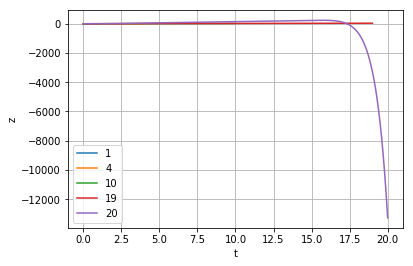

In [302]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    y_plot = sol[i].sol(x_plot)[1]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("z")
plt.legend()
plt.grid()
plt.show()

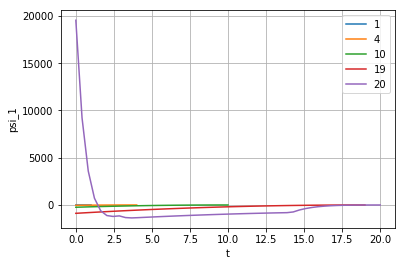

In [303]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].sol(x_plot)[2]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_1")
plt.legend()
plt.grid()
plt.show()

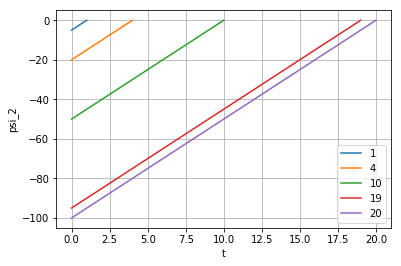

In [304]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 50)
    y_plot = sol[i].sol(x_plot)[3]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_2")
plt.legend()
plt.grid()
plt.show()

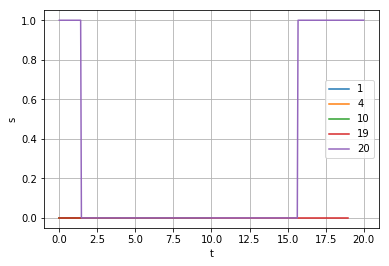

In [312]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 400)
    k = sol[i].sol(x_plot)[0]
    psi = sol[i].sol(x_plot)[2]
    y_plot = np.zeros(psi.shape)
    y_plot[psi * k - k >= 0] = 1
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("s")
plt.legend()
plt.grid()
plt.show()

__(8)__ $m(0) \to \underset{u, T} {min}\\ \dot{h} = v,\ \dot{v} = \frac{u - D(h,v)}{m} - c_1,\ \dot{m} = -\frac{u}{c_2},\\ h(0) = 0,\ h(T) = h_1,\ v(0)=0,\ u\in [0, u_1],\ D(h, v) = \frac{v|v|}{e^{\alpha h}},\ m(T)=m_1$

$H\left(x, u, \psi, t, \lambda_0 \right) = \psi_1 \cdot v + \psi_2 \cdot \left( \frac{u - D(h,v)}{m} - c_1 \right) - \psi_3 \cdot \frac{u}{c_2} \to max$    

$s \in [0, u_1]$, а функция H линейно зависит от s, поэтому ее максимум достигается в 0 или в $u_1$.

Краевая задача имеет следующий вид:    
$$
\begin{cases}
  u = u_1 \cdot Ind[\frac{\psi_2}{m} - \frac{\psi_3}{c_2} >= 0]\\
  \dot{h} = v\\
  \dot{v} = \frac{u - D(h,v)}{m} - c_1\\
  \dot{m} = -\frac{u}{c_2}\\
  D(h, v) = \frac{v|v|}{e^{\alpha h}}\\
  \dot{\psi_1} = - \alpha \frac{\psi_2}{m} \cdot v|v| e^{-\alpha h} \\
  \dot{\psi_2} = - \psi_1 + 2 sign(v) \cdot v e^{-\alpha h}\\
  \dot{\psi_3} = \psi_2(u - D(h, v)) \cdot \frac{1}{m^2}\\
  h(0) = 0\\
  h(T) = h_1\\
  v(0) = 0\\
  m(T) = m_1\\
  \psi_2(T) = 0\\
  \psi_3(0) = 1\\
\end{cases}
$$

In [350]:
def D(h, v):
    return v * np.abs(v) / np.exp(alpha * h)

In [378]:
T = [1, 4, 10, 19, 20]
alpha = 3
h1 = 3
m1 = 10
u1 = 1
sol = []

In [379]:
# p[0] = c_1
# p[1] = c_2

for i in T:
    def fun(x, y, p):
        u = u1 * (y[4]/y[2] - y[5]/p[1] >= 0)
        result = np.vstack((y[1], (u - D(y[0], y[1]))/y[2] - p[0],
                            -u/p[1], - alpha * y[4]/y[2] * y[1] * np.abs(y[1]) * np.exp(-alpha*y[0]),
                            -y[3] + 2 * y[1] * np.exp(-alpha*y[0]) * np.sign(y[1]),
                            y[4] * (u - D(y[0], y[1])) / y[2]**2))
        return result
    
    def bc(ya, yb, p):
        return np.array([ya[0], yb[0] - h1, ya[1], yb[2] - m1, yb[4], yb[5] - 1, ya[0], yb[0] - h1])
    
    x = np.linspace(0, i, i * 10 + 1)
    y = np.ones((6, x.size))
    
    sol_t = solve_bvp(fun, bc, x, y, p=[1, 1])
    sol.append(sol_t)

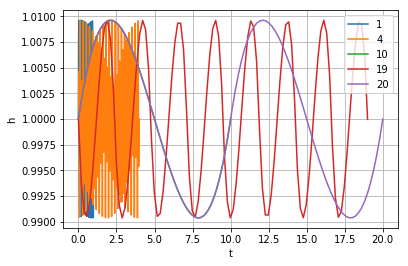

In [390]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("h")
plt.legend()
plt.grid()
plt.show()

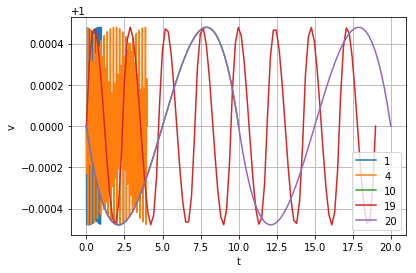

In [391]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[1]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("v")
plt.legend()
plt.grid()
plt.show()

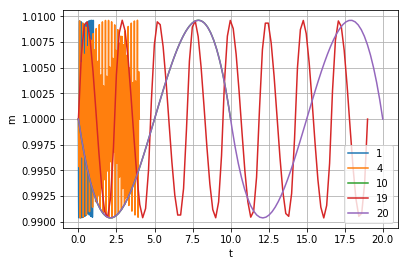

In [394]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[2]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("m")
plt.legend()
plt.grid()
plt.show()

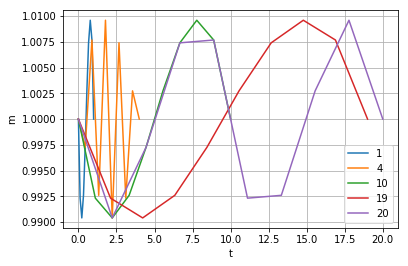

In [395]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 10)
    y_plot = sol[i].sol(x_plot)[2]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("m")
plt.legend()
plt.grid()
plt.show()

In [401]:
for i in range(len(T)):
    m_0 = sol[i].sol(0)[2]
    print(T[i], "-> m(0) =", m_0)

1 -> m(0) = 1.0
4 -> m(0) = 1.0
10 -> m(0) = 1.0
19 -> m(0) = 1.0
20 -> m(0) = 1.0


При всех T, которые были выбраны для анализа, $m(0) = 1$.

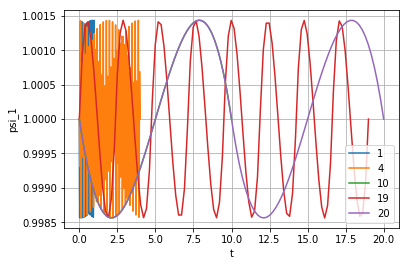

In [402]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[3]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_1")
plt.legend()
plt.grid()
plt.show()

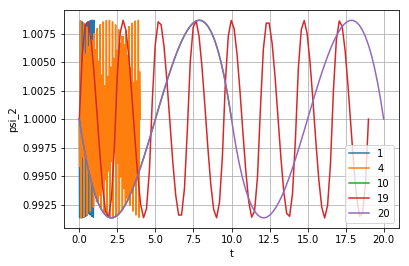

In [403]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[4]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_2")
plt.legend()
plt.grid()
plt.show()

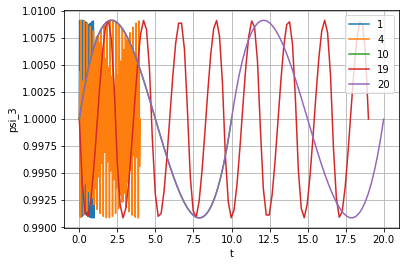

In [404]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 100)
    y_plot = sol[i].sol(x_plot)[5]
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("psi_3")
plt.legend()
plt.grid()
plt.show()

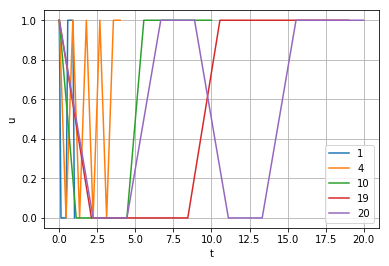

In [406]:
for i in range(len(T)):
    x_plot = np.linspace(0, T[i], 10)
    psi_2 = sol[i].sol(x_plot)[4]
    m = sol[i].sol(x_plot)[2]
    psi_3 = sol[i].sol(x_plot)[5]
    c_2 = sol[i].p[1]
    y_plot = u1 * (psi_2/m - psi_3/c_2 >= 0)
    plt.plot(x_plot, y_plot, label=str(T[i]))

plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()